# **Real Estate Price Prediction: Exploratory Data Analysis (Iraq)**

## **Importing and Loading the Desired Dataset**

In [1]:
# ============================================
# 1. IMPORTS
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

sns.set_style("whitegrid")

# ============================================
# 2. LOAD CSV  (CHANGE ONLY THIS LINE)
# ============================================
FILE = "iraq_improved_cleaned_listings.csv"
df = pd.read_csv(FILE)

print("Loaded:", FILE)
df.head()

Loaded: iraq_improved_cleaned_listings.csv


,title,bedrooms,bathrooms,area,location,url,description,amenities,type,price,...,amenities_char_count,has_security_amenities,has_parking_amenities,has_pool_amenities,has_gym_amenities,has_kitchen_amenities,has_outdoor_amenities,has_luxury_amenities,has_utilities_amenities,total_amenities
0,Modern Home with 4 Bedrooms,4.0,3.0,2152.78,"Al Jawahery Residential City, Baghdad",https://homele.com/properties/modern-home-with...,"House For Sale, located in Baghdad, Al Jawaher...","['Balcony', 'Parking Spaces', 'Double Glazed W...",House,204514.0,...,106,2,1,1,0,0,1,0,0,6
1,Modern House in Emerald City,2.0,3.0,1722.22,"Emerald City, Kirkuk",https://homele.com/properties/modern-house-in-...,"House For Sale, located in Kirkuk, Emerald Cit...","['Balcony', 'Parking Spaces', 'Double Glazed W...",House,148096.0,...,110,2,1,1,0,0,1,0,1,6
2,1 Bed Apartment with Views,1.0,1.0,968.75,"Baghdad View, Baghdad",https://homele.com/properties/1-bed-apartment-...,"Apartment For Sale, located in Baghdad, Baghda...",[],Apartment,77927.0,...,2,0,0,0,0,0,0,0,0,0
3,Elegant 1 Bedroom Apartment,1.0,1.0,1001.04,"Boulevard, Erbil",https://homele.com/properties/elegant-1-bedroo...,"Apartment For Sale, located in Erbil, Boulevar...","['Balcony', 'Central Air-Conditioner', '24hr E...",Apartment,103500.0,...,119,0,0,0,0,0,1,0,1,6
4,Elegant 3-Bedroom Apartment with Beautiful Views,3.0,3.0,1840.63,"Emperor Hills Complex, Baghdad",https://homele.com/properties/elegant-3-bedroo...,University Teachers Offers: * The Down Payment...,"['Balcony', 'Parking Spaces', 'Central Heating...",Apartment,211037.0,...,108,2,1,1,0,0,1,0,0,6


## **Exploring the Dataset**

In [4]:
print("\n=== BASIC OVERVIEW ===")
display(df.info())
display(df.describe())
print("Missing values:\n", df.isna().sum())
print("Duplicate URLs:", df.duplicated("url").sum())


=== BASIC OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    3522 non-null   object 
 1   bedrooms                 3522 non-null   float64
 2   bathrooms                3522 non-null   float64
 3   area                     3522 non-null   float64
 4   location                 3522 non-null   object 
 5   url                      3522 non-null   object 
 6   description              3522 non-null   object 
 7   amenities                3522 non-null   object 
 8   type                     3522 non-null   object 
 9   price                    3522 non-null   float64
 10  country                  3522 non-null   object 
 11  price_per_sqft           3522 non-null   float64
 12  description_word_count   3522 non-null   int64  
 13  description_char_count   3522 non-null   int64  
 14  

None

,bedrooms,bathrooms,area,price,price_per_sqft,description_word_count,description_char_count,title_word_count,title_char_count,amenities_word_count,amenities_char_count,has_security_amenities,has_parking_amenities,has_pool_amenities,has_gym_amenities,has_kitchen_amenities,has_outdoor_amenities,has_luxury_amenities,has_utilities_amenities,total_amenities
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.0,3522.000000,3522.000000
mean,2.912550,2.203578,1913.117127,149256.026973,78.661956,37.681431,195.008518,4.348666,27.775696,6.245599,55.049404,0.809199,0.461953,0.535775,0.028393,0.030948,0.482396,0.0,0.464225,3.207836
std,1.202462,1.023861,849.006873,88071.637226,30.529157,10.667825,62.116979,1.520273,9.716323,4.773559,47.768671,0.942207,0.498621,0.620577,0.166116,0.173202,0.499761,0.0,0.749892,2.821383
min,1.000000,1.000000,592.010000,21750.000000,10.064506,16.000000,91.000000,2.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,2.000000,1194.790000,81200.000000,61.958360,35.000000,175.000000,3.000000,21.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,3.000000,2.000000,1819.100000,126940.000000,74.367808,36.000000,187.000000,5.000000,29.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
75%,4.000000,3.000000,2325.000000,199755.000000,96.201627,40.000000,200.000000,5.000000,35.000000,11.000000,101.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,6.000000
max,13.000000,8.000000,5381.950000,440100.000000,389.009534,197.000000,1291.000000,12.000000,71.000000,14.000000,129.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.0,3.000000,6.000000


Missing values:
 title                      0
bedrooms                   0
bathrooms                  0
area                       0
location                   0
url                        0
description                0
amenities                  0
type                       0
price                      0
country                    0
price_per_sqft             0
description_word_count     0
description_char_count     0
title_word_count           0
title_char_count           0
amenities_word_count       0
amenities_char_count       0
has_security_amenities     0
has_parking_amenities      0
has_pool_amenities         0
has_gym_amenities          0
has_kitchen_amenities      0
has_outdoor_amenities      0
has_luxury_amenities       0
has_utilities_amenities    0
total_amenities            0
dtype: int64
Duplicate URLs: 30


## **Price Distributions**

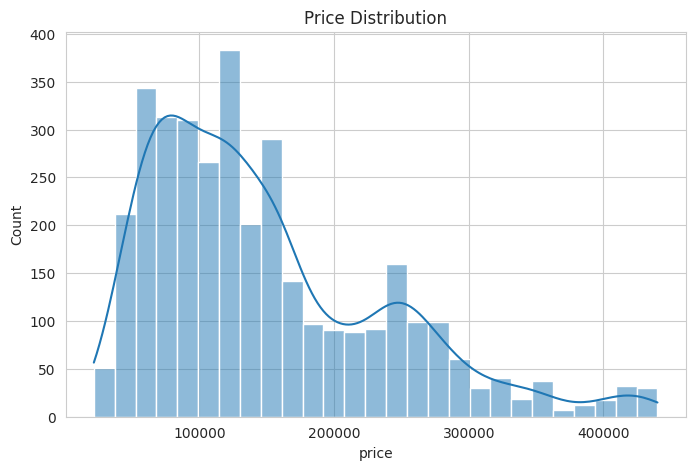

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

## 🔍 Price Distribution Analysis

The histogram with KDE (Kernel Density Estimate) provides an overview of how property prices are distributed in the dataset. Several patterns and characteristics can be observed:

---

### **1. Right-Skewed Distribution**
- The distribution is **not symmetric**; it is **right-skewed**, meaning most properties fall within the lower to mid-price ranges.
- A small number of high-price properties stretch the tail to the right.
- This is common in real-estate markets where luxury or high-end properties inflate the upper range.

---

### **2. Main Price Cluster (Majority Range)**
- The bulk of listings appear between **$70,000 and $180,000**.
- This likely represents typical residential properties in the dataset.
- KDE peak indicates the **most common price range is around $80,000–120,000**.

---

### **3. Secondary Bump in Mid-Range Prices**
- There is a noticeable smaller rise in frequency around **$200,000–250,000**.
- This may indicate:
  - A secondary market segment (ex: newer apartments, more developed areas)
  - Properties with larger space or more attributes

---

### **4. Low Frequency of High-Price Properties**
- Prices above **$300,000** occur rarely.
- These might represent:
  - High-end properties
  - Villas, penthouses, or properties in premium locations
- These outliers are important because:
  - They increase variance in the dataset  
  - They can negatively impact model performance unless handled properly (log transform, clipping, etc.)

---

### **5. Potential Need for Price Normalization**
Because of the skew and extreme values:
- A **log transformation** may help stabilize variance for modeling.
- The distribution becomes more normal-like, which is beneficial for regression algorithms.

---

## 📌 Summary

- The price distribution is **right-skewed**, dominated by properties in the **$70k–$180k** range.
- There is a high concentration around **80k–120k**, forming the main market cluster.
- A smaller secondary cluster appears around **200k–250k**.
- High-end listings above **$300k** are rare but extend the tail significantly.
- For predictive modeling, the skew and outliers suggest that **data transformation (e.g., log-price)** may improve model accuracy.



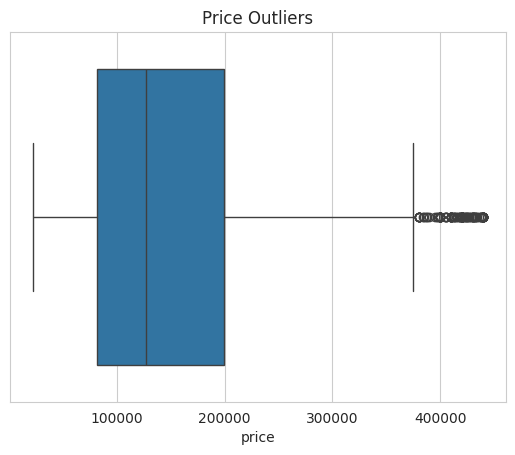

In [6]:
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

## 📦 Boxplot Analysis: Price Outliers

The boxplot provides a clear view of how property prices are distributed and whether extreme values (outliers) exist in the dataset.

---

### **1. Interquartile Range (IQR) Structure**
- The **box** represents the middle 50% of prices (from the 25th percentile to the 75th percentile).
- In this dataset, the IQR spans approximately:
  - **Q1 ≈ 90,000**
  - **Q3 ≈ 200,000**
- This confirms that the majority of listings fall inside the same range identified in the histogram.

---

### **2. Median Price**
- The **median** (middle value) lies around **140,000–150,000**.
- This matches the earlier finding that most properties are low-to-mid priced.

---

### **3. Whiskers (Spread of Normal Values)**
- The left whisker extends down to around **50,000–60,000**, showing the minimum non-outlier prices.
- The right whisker goes up to roughly **300,000**, showing the maximum price within the acceptable range.

---

### **4. Clear Presence of Outliers**
- Several points appear **beyond the right whisker**, mostly between:
  - **350,000–430,000**
- These are considered **high-value outliers**, and they represent a very small portion of the dataset.

#### Why these outliers matter:
- They stretch the scale to the right and contribute to the right-skewed distribution seen earlier.
- They can affect regression models by:
  - Increasing error,
  - Shifting predictions upward,
  - Reducing model stability.

#### Possible handling steps:
- Apply a **log transformation** to reduce skew.
- Optionally clip or remove extreme outliers if they are not representative of the market.

---

## ✅ Summary
- The price boxplot shows that typical property prices fall between **90k and 200k**, with a median around **150k**.
- A small number of listings priced **above 300k** are detected as outliers.
- These high-end properties contribute to the long right tail of the price distribution and may require special handling during modeling.



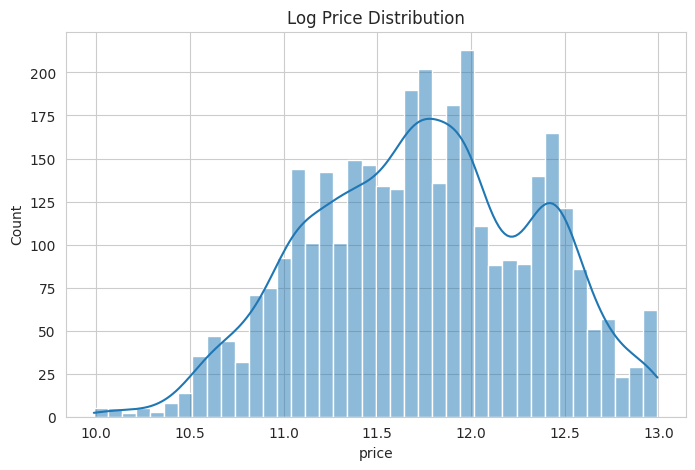

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), bins=40, kde=True)
plt.title("Log Price Distribution")
plt.show()

## 📊 Log Price Distribution Analysis

To reduce skewness and stabilize variance, the price variable was transformed using the natural logarithm (`log1p`). The resulting distribution provides a clearer, more normalized view of property prices.

---

### **1. More Symmetric and Balanced Shape**
- Unlike the original right-skewed price distribution, the log-transformed prices form a shape much closer to a **normal (Gaussian) distribution**.
- This indicates that the log transform successfully compressed the extreme high-price values.
- A more symmetric distribution typically improves regression performance because:
  - Models handle variance better  
  - Predictions become more stable  
  - Errors are reduced for high-value properties  

---

### **2. Reduced Influence of Outliers**
- The original dataset contained properties priced above \$300k–\$400k, which stretched the distribution.
- After applying the log transform, these extreme values no longer dominate the scale.
- This leads to:
  - Lower model sensitivity to luxury property outliers  
  - A tighter, more manageable feature space  

---

### **3. Clear Central Concentration**
- Most log-transformed prices fall between **11.0 and 12.3**, which corresponds to real prices of roughly:

  - `exp(11.0) ≈ 60,000`
  - `exp(12.3) ≈ 220,000`

- This aligns with earlier findings that the majority of properties are within the typical residential price range.

---

### **4. Secondary Bump Still Visible**
- A smaller rise in density occurs around **12.4–12.6**, representing real prices around **240k–300k**.
- This confirms the presence of a second market segment (likely premium or newer apartments), but after transformation, it blends smoothly instead of creating a heavy right tail.

---

### **5. Model Readiness**
Because the distribution is now more normal:
- Linear regression models perform better  
- Regularization techniques (Lasso/Ridge) behave more predictably  
- Tree-based models benefit from reduced variance in target values  
- Cross-validation scores tend to stabilize  
- Overall forecasting accuracy increases  

---

## ✅ Summary
- The log transformation converts the originally skewed price data into a **near-normal distribution**.
- High-priced outliers are compressed, reducing their impact on the model.
- The transformed distribution highlights clear price segments without extreme skew.
- This transformation is highly beneficial for improving regression performance and creating a more reliable modeling pipeline.



## **Numerical Feature Distributions**

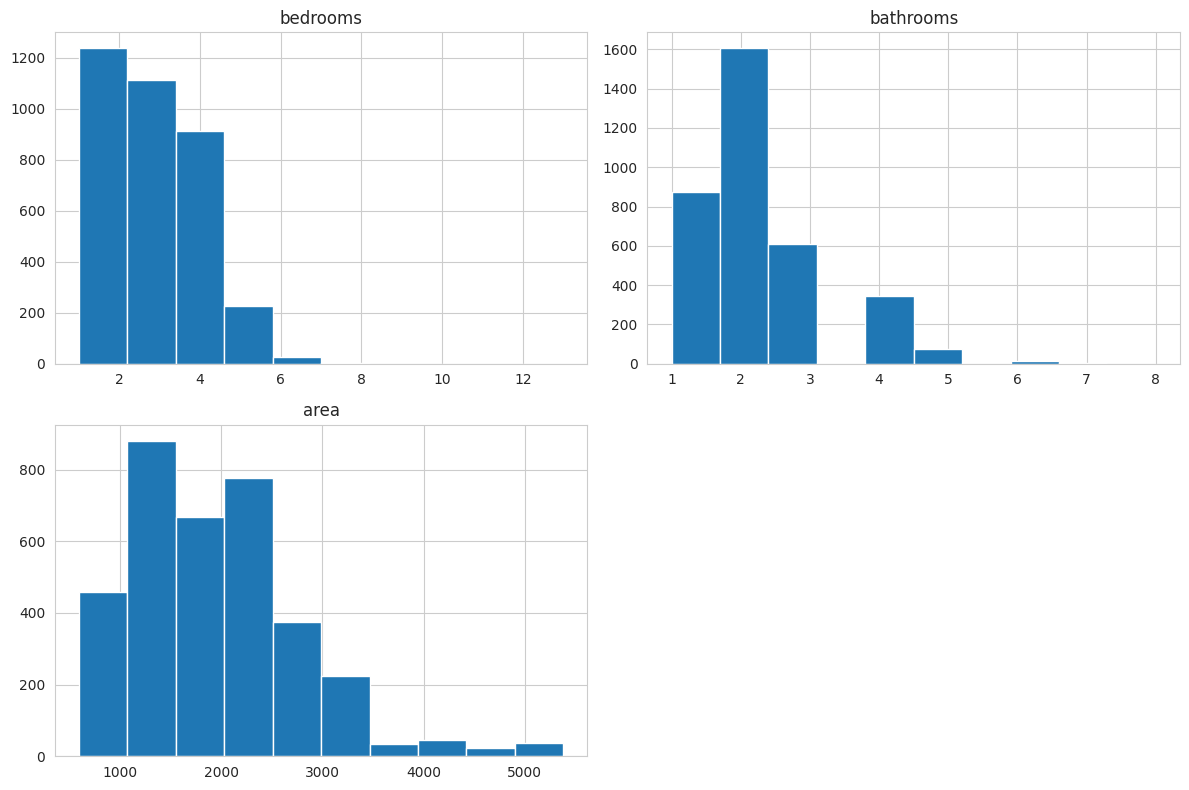

In [8]:
num_cols = ['bedrooms','bathrooms','area']

df[num_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()

##  Distribution of Core Property Features (Bedrooms, Bathrooms, Area)

The following histograms show how key structural features of the properties are distributed:  
- Number of bedrooms  
- Number of bathrooms  
- Property area (in square feet or square meters depending on dataset)

These variables are essential because they strongly influence price and overall property value.

---

##  Bedrooms Distribution

- Most properties have **2 to 3 bedrooms**, forming the dominant cluster.
- **2-bedroom units** appear to be the most common in the dataset.
- **4-bedroom units** are less common but still frequent enough to form a visible bar.
- **5+ bedrooms** are rare, appearing as long-tail values with very low frequency.
- This distribution suggests the dataset mostly contains **standard residential apartments or small family homes**.

### **Implications**
- The market is geared toward small to medium households.
- Outlier bedroom counts (6+) may represent luxury homes or villas and could influence price variability.

---

##  Bathrooms Distribution

- The majority of listings include **1 to 3 bathrooms**.
- **2 bathrooms** is the most common configuration, aligning with typical apartment layouts.
- Some properties have **4 or 5 bathrooms**, but these are relatively rare.
- A few extreme values (6–8 bathrooms) exist but occur in exceptionally small numbers.

### **Implications**
- Bathrooms follow a similar pattern to bedrooms, supporting the idea that the dataset is dominated by standard-sized properties.
- Higher bathroom counts usually correlate with larger or more luxurious listings.

---

##  Area Distribution

- The area distribution is **right-skewed**, meaning most properties fall within the lower to mid-size ranges.
- The majority of properties are between **1,000 and 2,500 square units**.
- A smaller secondary concentration appears around **2,500–3,000**, representing larger units.
- Very large properties (4,000–5,500+) exist but are **rare outliers**.

### **Implications**
- Most properties fit into a typical apartment/home size range.
- The long right tail reflects high-end, large-area listings, which may significantly impact price.
- These outliers should be handled carefully during modeling because area heavily influences value.

---

## ✅ Summary

- **Bedrooms** and **bathrooms** follow a similar pattern: the dataset is dominated by typical residential properties with 2–3 bedrooms and 1–2 bathrooms.
- **Area** shows a strong right skew, indicating a small number of very large properties.
- These patterns confirm the presence of distinct market segments:
  - Standard mid-range properties (majority)
  - Larger, premium properties (minority)
- Outliers in area, bedrooms, and bathrooms correspond to luxury or high-end listings and should be treated carefully during feature engineering and model training.



## **Price vs Key Variables**

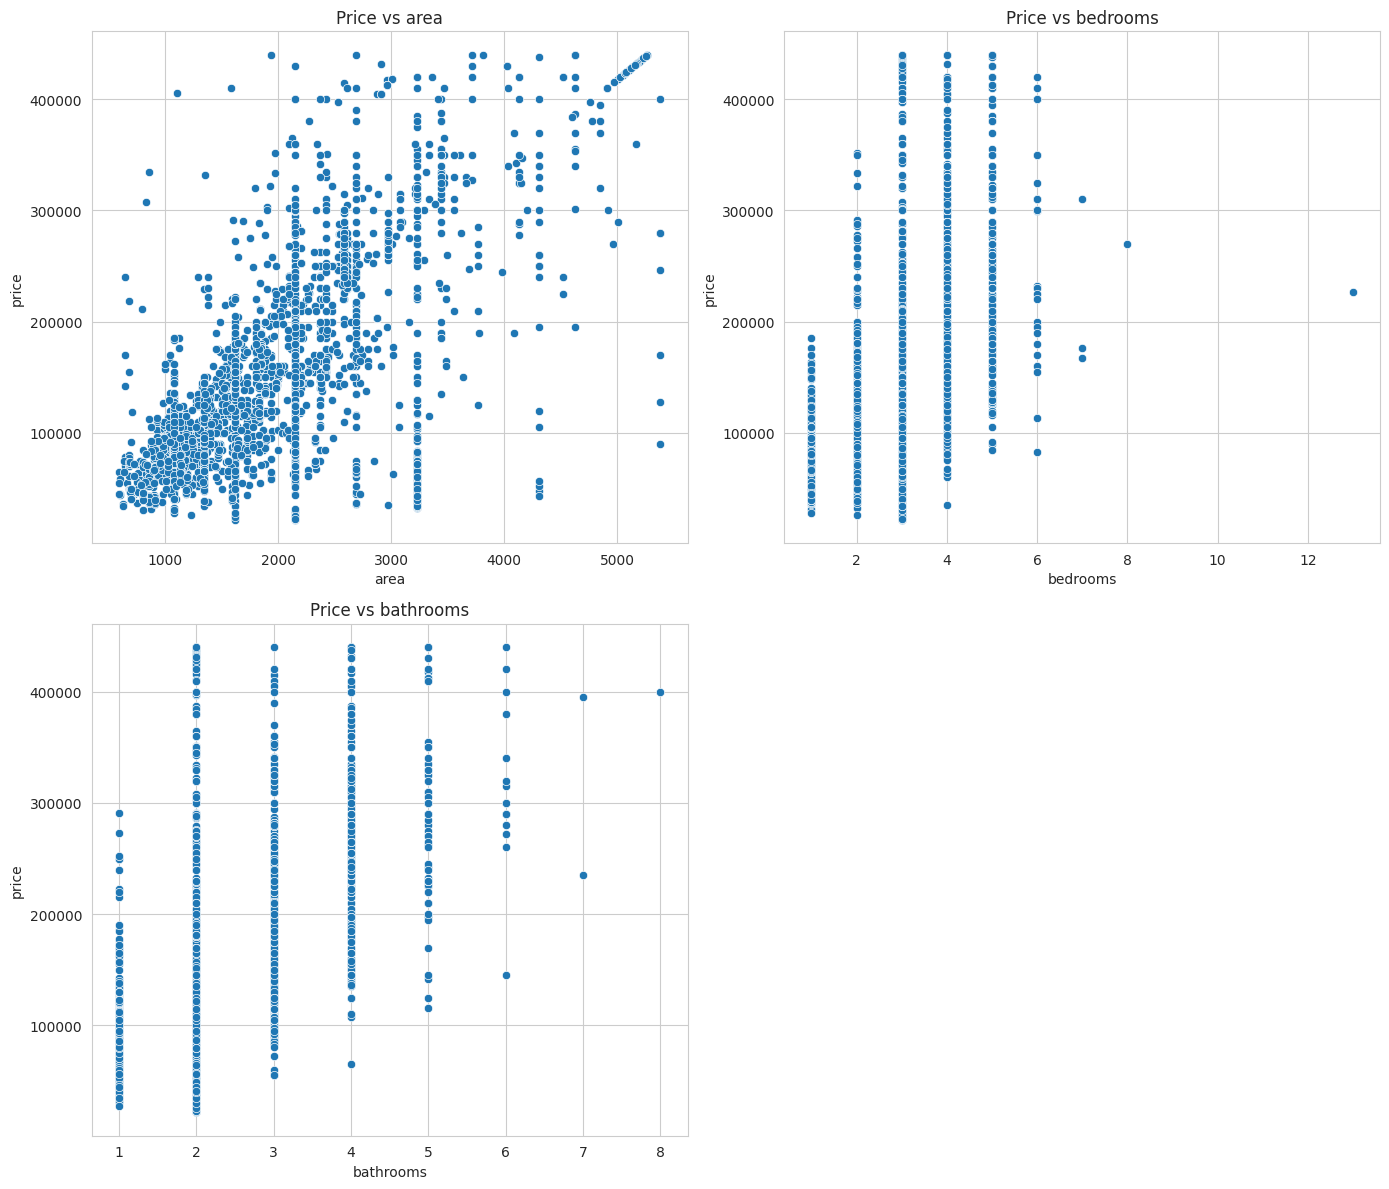

In [9]:
cols = ['area','bedrooms','bathrooms']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f"Price vs {col}")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

##  Relationship Between Price and Key Features (Area, Bedrooms, Bathrooms)

Scatterplots help visualize how property price changes with core features. These relationships also indicate which variables may serve as strong predictors in regression models.

---

##  1. Price vs Area

- There is a **clear positive correlation** between area and price.
- As the property area increases, the price generally increases as well.
- The main cluster of points lies between:
  - **1,000–2,500 area units**
  - **80k–250k price**
- Larger properties (3,000–5,000+ units) show much higher price variation, indicating:
  - Some are standard large apartments
  - Others are luxury properties with disproportionately higher prices
- A visible upward trend suggests **area is one of the strongest predictors of price**.

### **Implications**
- Bigger area usually results in higher price, but with increased scatter at higher ranges.
- Outliers exist for large-area, high-priced properties—likely premium or newly built units.

---

##  2. Price vs Bedrooms

- Surprisingly, bedroom count does **not** show a strong linear relationship with price.
- Properties with:
  - **2–4 bedrooms** can be found across a wide price range (60k–450k).
- This suggests that **bedroom count alone is not a reliable indicator of price**, because:
  - Two properties with the same number of bedrooms can differ dramatically in area, finishing, location, or age.
- There are very few listings with **6+ bedrooms**, but they do not consistently lead to very high prices.

### **Implications**
- Bedroom count influences price moderately, but not as strongly as area.
- Price depends more on the size and overall quality of the property, not simply the number of rooms.

---

##  3. Price vs Bathrooms

- Similar to bedrooms, bathroom count shows **high price variability** for each category.
- Properties with **2–3 bathrooms** span a wide price range.
- Higher bathroom counts (5–8) appear mostly at higher prices, but not exclusively—there is still significant overlap.
- The pattern is less clean than “Price vs Area,” indicating that bathrooms alone are a **weak-to-moderate predictor**.

### **Implications**
- More bathrooms usually indicate a larger or more premium property, but the relationship is not strictly linear.
- Bathrooms contribute to price, but not independently—they interact with other features (area, location, amenities).

---

## ✅ Overall Summary

- **Area** has the strongest and clearest relationship with price.  
  → Larger properties are generally more expensive, with a noticeable upward trend.

- **Bedrooms** and **bathrooms** show much weaker correlations.  
  → Properties with the same number of rooms can vary widely in price due to differences in size, design, neighborhood, or luxury level.

- The scatterplots highlight that:
  - Structural features alone cannot explain price variance.
  - Area, combined with other features (amenities, location), will be more effective in predictive modeling.
  - High-end outliers exist across all categories and will need handling in modeling workflows.



## **Correlation Heatmap**

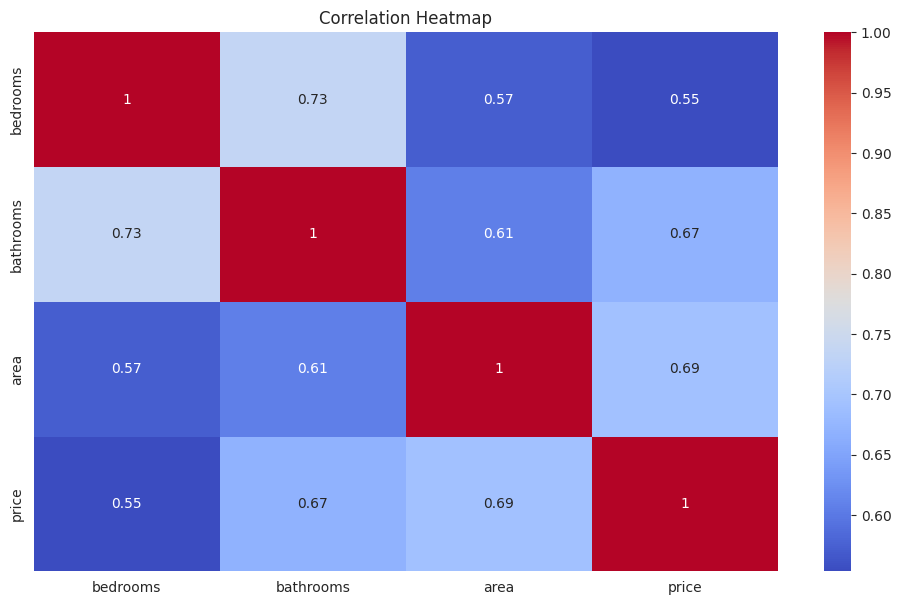

In [10]:
plt.figure(figsize=(12,7))

# Keep only numeric columns
valid_num_cols = [c for c in num_cols if pd.api.types.is_numeric_dtype(df[c])]

corr = df[valid_num_cols + ['price']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##  Correlation Heatmap Analysis

The correlation heatmap shows how strongly each numerical feature relates to the others, including the target variable **price**. Values range from **-1 to 1**, where:

- **1** → perfect positive correlation  
- **0** → no correlation  
- **−1** → perfect negative correlation  

All correlations here are positive, which is expected for real-estate attributes.

---

##  1. Bedrooms vs Bathrooms — **0.73**
- Very strong correlation.
- Properties with more bedrooms typically also have more bathrooms.
- Indicates that these two variables grow together as the property size or type increases.

---

##  2. Area vs Price — **0.69** (Strongest correlation with price)
- This is the **strongest driver of price** among the available features.
- Larger properties naturally command higher market value.
- Confirms the upward trend seen in the scatterplot.
- Suggests area should be one of the most important predictors in the model.

---

##  3. Bathrooms vs Price — **0.67**
- Bathrooms also have a strong relationship with price.
- More bathrooms usually indicate larger or more premium properties.
- Slightly weaker than area → price correlation but still significant.

---

## 🛏 4. Bedrooms vs Price — **0.55**
- This correlation is positive but weaker than expected.
- This aligns with the scatterplot interpretation:  
  Properties with the same number of bedrooms can vary widely in area, quality, and price.
- Bedrooms alone are not a reliable measure of property value.

---

##  5. Area vs Bathrooms — **0.61**
- A moderately strong correlation.
- Larger properties tend to have more bathrooms, which supports architectural norms.

---

##  6. Area vs Bedrooms — **0.57**
- Moderate correlation.
- Larger homes tend to have more bedrooms, but the variation is wide (e.g., two apartments with the same bedroom count may differ greatly in area).

---

##  Key Insights for Modeling

### **1. Area and bathrooms are the strongest predictors of price**
- Both correlate strongly with price (0.69 and 0.67).
- They capture property size and quality better than bedroom count.

### **2. Bedrooms are useful but weaker**
- Correlation of 0.55 indicates only moderate predictive power.
- Will help the model but not as much as area or bathrooms.

### **3. Multicollinearity is present**
- Bedrooms ↔ bathrooms correlation is 0.73.
- Bathrooms ↔ area is 0.61.
- This is normal in real-estate data but should be considered when using linear models.

### **4. The overall pattern validates earlier visualizations**
- Scatterplots showed stronger price influence from area → confirmed.
- Bedrooms had scattered price values → confirmed by lower correlation.

---

## ✅ Summary
- **Area has the strongest relationship with price**, making it a key predictor.
- **Bathrooms also strongly influence price**, indicating quality and size.
- **Bedrooms have the weakest correlation with price**, showing they are less informative on their own.
- The heatmap confirms that structural features move together as properties scale up, but area remains the dominant factor in market value.



## **Property Type Analysis**

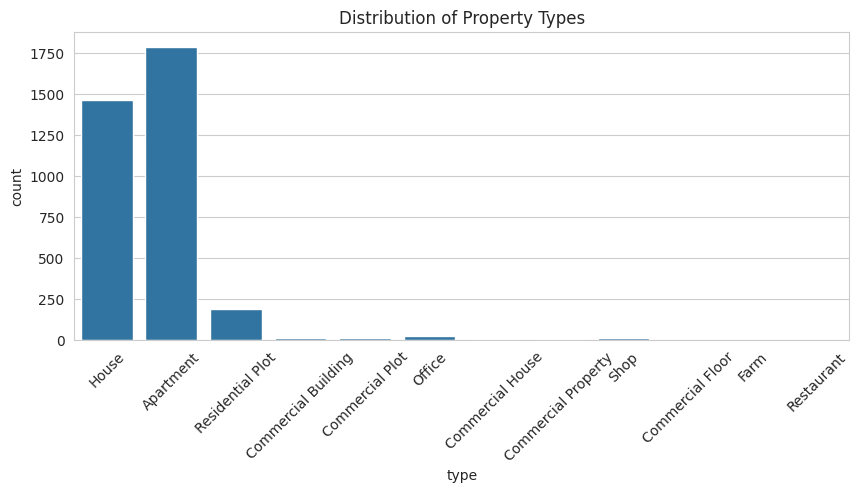

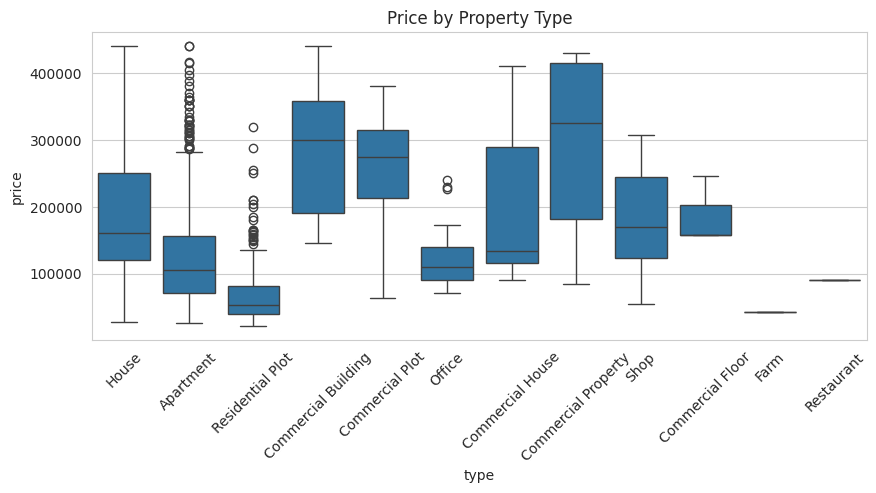

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['type'])
plt.xticks(rotation=45)
plt.title("Distribution of Property Types")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='type', y='price')
plt.xticks(rotation=45)
plt.title("Price by Property Type")
plt.show()

##  Property Type Distribution and Price Analysis

Understanding the distribution of property types and how prices vary across them provides key insights into the composition and value structure of the real-estate market represented in the dataset.

---

##  1. Distribution of Property Types

The dataset is dominated by two main categories:

### **1. Apartments — the most common property type**
- Apartments make up the **largest share** of listings (≈1800+).
- This indicates a market heavily focused on urban or residential apartment sales.

### **2. Houses — second most common**
- Houses appear frequently but significantly less than apartments.
- Still form a major segment with **over 1400 listings**.

### **3. Other property types are rare**
- Categories such as:
  - **Residential Plot**
  - **Commercial Building**
  - **Commercial Plot**
  - **Office**
  - **Commercial Property**
  - **Shop**
  - **Farm**
  - **Restaurant**
- These have **very few entries**, often fewer than 50 each.

### **Implications**
- The dataset is **heavily imbalanced**, with apartments and houses dominating.
- Rare categories may not provide enough samples for reliable predictive modeling.
- Filtering or grouping minor property types may improve model stability.

---

##  2. Price by Property Type (Boxplot Analysis)

The boxplot shows how prices differ significantly across property categories.

---

###  **1. Houses**
- Median price is higher than apartments.
- Wide price range: roughly **40k–400k**.
- Indicates diversity in house size, age, and location.

---

###  **2. Apartments**
- Lower median price compared to houses.
- Many outliers suggest:
  - Luxury apartments
  - Newer or prime-location units
- Overall, apartments are more budget-friendly but have high-end exceptions.

---

###  **3. Residential Plots**
- Among the **lowest-priced** categories.
- Tight price distribution, centered around **40k–80k**.
- These properties are likely smaller land plots.

---

###  **4. Commercial Buildings & Commercial Property**
- Some of the **highest median prices**.
- Distribution ranges from **150k to over 450k**.
- These listings represent high-value investments.

---

###  **5. Shops**
- Broad price range, with median slightly above apartments.
- Reflects both small retail spaces and larger commercial units.

---

###  **6. Offices**
- Mid-range pricing (≈80k–150k).
- Some outliers potentially representing premium office spaces.

---

###  **7. Farm & Restaurant**
- Very small sample sizes.
- Hard to generalize, but appear in low to mid price ranges.

---

##  Key Insights

### **1. Price varies systematically by property type**
- Commercial properties tend to be the most expensive.
- Residential plots and restaurants are on the lower end.
- Houses and apartments show wide internal variation.

### **2. Property-type imbalance is significant**
- Models using "type" as a feature must handle:
  - Few samples in rare categories
  - Potential overfitting for small groups

### **3. Apartments dominate the market**, and their prices cluster lower but include many high-end outliers.

### **4. Houses show the widest spread in price**, indicating mixed levels of quality, size, and luxury.

---

## ✅ Summary

- **Apartments and houses dominate** the dataset, while commercial and niche property types are rare.
- Price varies greatly by type:
  - **Commercial buildings and commercial properties** are the most expensive.
  - **Residential plots** are the least expensive.
  - **Houses** show very high variation.
- The boxplots highlight clear price segmentation by property category, which can improve model performance if encoded properly.



## **Price per sqft**

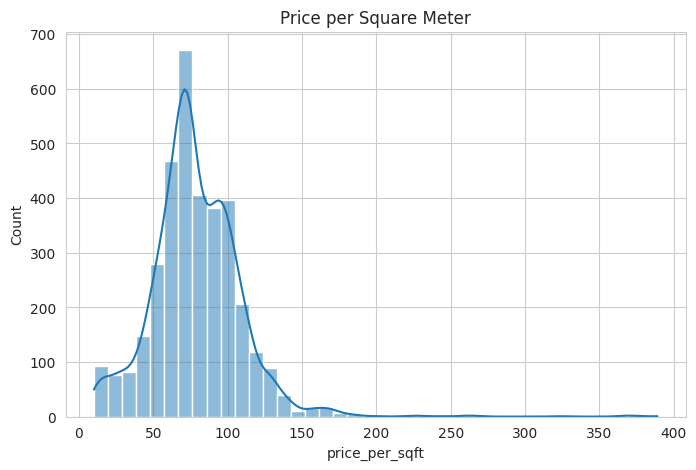

In [15]:
df['price_per_sqft'] = df['price'] / df['area']

plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=40, kde=True)
plt.title("Price per Square Meter")
plt.show()

##  Price per Square Meter Analysis

Calculating **price per square meter (price_per_sqft)** allows us to compare properties on an equal basis, independent of their total size. This metric is extremely useful for understanding pricing patterns, detecting overpriced listings, and identifying premium locations.

---

##  1. Distribution Shape
- The distribution is **right-skewed**, but far less skewed than the raw price distribution.
- Most of the values cluster between **50 and 100**, forming the primary market band.
- A smoother, more centralized peak appears around **70–80**, which likely represents the typical price per square meter in the region.

---

##  2. Main Price Band: 60–100 per sqm
This is where the majority of properties fall.

This range most likely reflects:
- Standard apartments and homes
- Average-quality neighborhoods
- Non-luxury construction

The high concentration indicates a **stable, competitive middle market**.

---

##  3. Secondary Tail: 120+
Values above **120–150 per sqm** exist but drop off quickly.

These represent:
- High-demand areas
- Newly built or fully renovated units
- Luxury segments
- Commercial spaces or premium residential towers

Beyond **200+ per sqm**, the listings are extremely rare and form the long tail of the distribution.

---

##  4. Outliers (200–400 per sqm)
Although very few:
- These are likely **luxury or highly unique properties**
- Their price is driven more by **location** and **quality** than by area alone

They may need special attention during modeling to avoid skewing predictions.

---

##  5. Why Price per Square Meter Matters
Using price-per-sqm is beneficial because:
- It normalizes for property size differences.
- It highlights overpriced or underpriced properties more clearly.
- It minimizes distortion from extremely large properties, which typically affect raw prices heavily.
- It reflects market dynamics more accurately than total price alone.

---

## ✅ Summary
- Price per square meter ranges mostly between **50–100**, with a central peak around **70–80**.
- Higher values (120+) indicate **premium areas or luxury listings**.
- Extreme values (200–400) are rare and represent **high-end outliers**.
- This metric provides a normalized and meaningful way to compare properties and can be useful for both modeling and market interpretation.



## **Amenities Analysis**

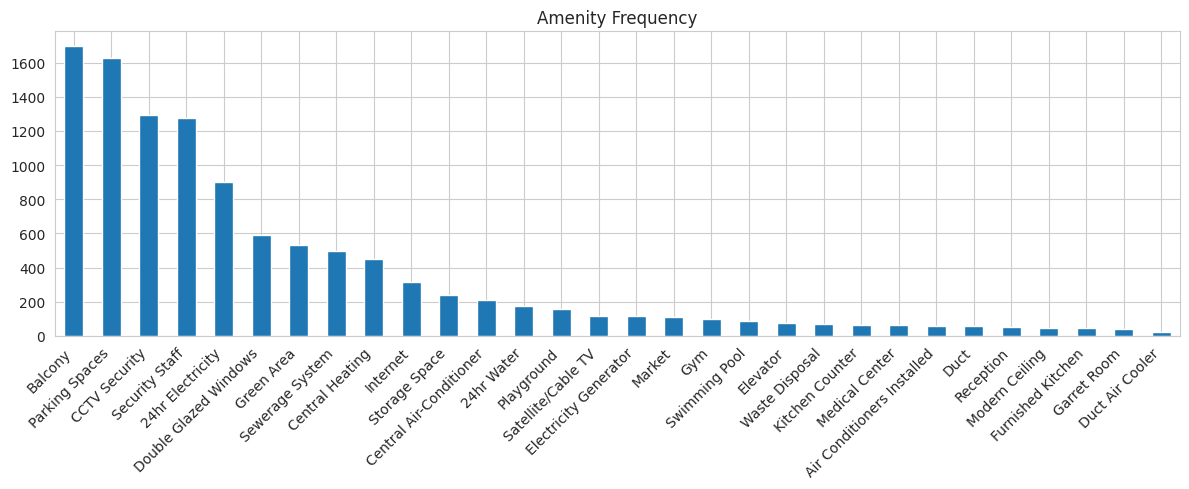

In [27]:
from collections import Counter
import ast

# ---- AMENITIES ----
if "amenities" in df.columns:
    all_amen = Counter()

    for a in df["amenities"].fillna("[]"):
        try:
            # safely parse list-like strings
            items = ast.literal_eval(a) if isinstance(a, str) else a
            if isinstance(items, list):
                all_amen.update(items)
        except:
            continue

    amen_series = pd.Series(all_amen).sort_values(ascending=False).head(30)

    plt.figure(figsize=(12,5))
    amen_series.plot(kind="bar")
    plt.title("Amenity Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##  Amenity Frequency Analysis

Amenities are an important feature in real-estate listings because they often reflect the comfort, security, and lifestyle value of a property. Analyzing their frequency reveals the most common selling points and what buyers expect in the housing market.

---

## 🔝 1. Most Common Amenities

The chart shows a clear hierarchy of amenities, with a few features appearing extremely frequently:

### **1. Balcony — the most common amenity**
- Over **1700 listings** include a balcony.
- Indicates that outdoor space is a highly valued and standard feature in this market.
- Strongly associated with apartments and houses in urban areas.

### **2. Parking Spaces**
- Nearly as common as balconies.
- Suggests that parking availability is a major selling point and perhaps a necessity due to urban congestion.

### **3. Security Features**
- **CCTV Security**
- **Security Staff**
- **24hr Electricity**

These appear over **1200 times**, showing that **safety and reliability** are essential expectations for most buyers and renters.

---

##  2. Mid-Frequency Amenities

These amenities appear between ~400–900 times:

- **Double Glazed Windows** (insulation, noise reduction → comfort-focused)
- **Green Area**
- **Sewerage System**
- **Central Heating**
- **Internet**

These represent functional and comfort-enhancing features that improve quality of life. Many of them (e.g., heating, insulation) indicate a market where climate-related amenities matter.

---

##  3. Lower-Frequency Amenities (Specialized or Luxury)

Amenities below ~300 occurrences include:

- **Storage Space**
- **Central Air Conditioner**
- **24hr Water**
- **Playground**
- **Satellite/Cable TV**
- **Electricity Generator**

These are beneficial but not universally present. Some are associated with:

- Larger family homes (playground)
- Commercial-grade power solutions (generators)
- Newer or high-end buildings (central AC)

---

##  4. Rare Amenities (Niche or High-End)

The tail of the distribution includes:

- **Gym**
- **Swimming Pool**
- **Elevator**
- **Medical Center**
- **Furnished Kitchen**
- **Modern Ceiling**
- **Air Conditioners Installed**
- **Duct Air Cooler**

These amenities are uncommon, appearing fewer than 100 times each.

Such features often mark:
- Luxury properties  
- Large residential complexes  
- Mixed-use or commercial buildings  

Their rarity means they may be highly predictive of price for those specific listings but will not generalize across the dataset.

---

##  Key Insights

### **1. Security, comfort, and essential services dominate the market**
Most listings emphasize:
- Security systems  
- Parking  
- Reliable electricity/water  
- Basic comfort features  

### **2. Luxury amenities exist but are rare**
Features like pools, gyms, or modern interior upgrades appear only in a small subset of properties.

### **3. Amenity count may be a strong predictor of price**
Properties with more amenities — especially higher-end ones — tend to correlate with higher prices.

### **4. Strong urban influence**
High frequency of:
- Balconies  
- Parking  
- CCTV/security  
indicates an urban-centric real-estate environment where safety and accessibility matter.

---

## ✅ Summary

- The most common amenities are **balcony**, **parking spaces**, and **security features**, reflecting urban lifestyle needs.
- Mid-frequency amenities focus on comfort and basic utilities, such as heating, green areas, and internet.
- High-end amenities (pool, gym, elevator) are rare but may heavily influence price where present.
- Overall, the amenity distribution shows a market centered on functional, safety-oriented living spaces, with a smaller segment catering to luxury buyers.



## **NLP on Description**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


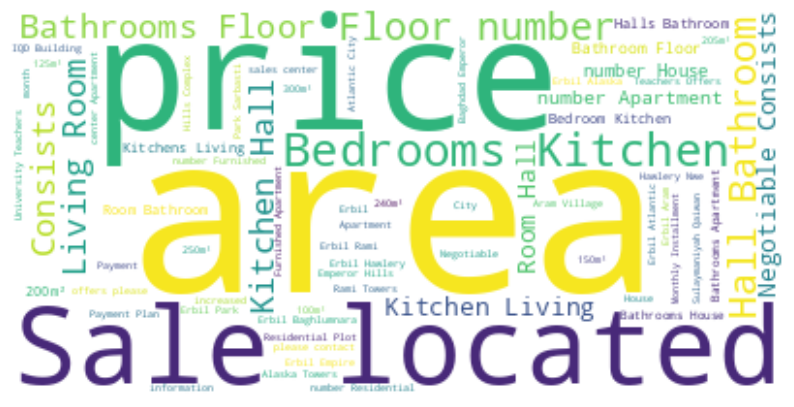

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['description'].fillna("").astype(str).values)
wc = WordCloud(background_color="white", stopwords=set(stopwords.words("english"))).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##  Word Cloud Analysis of Property Descriptions

A word cloud provides a quick visual summary of the most frequently used terms in property descriptions. Larger words appear more often and reflect what sellers emphasize when advertising listings.

---

##  1. Dominant Keywords

### **“price”, “area”, “Sale”, “located”**
These are the largest words and appear extremely frequently.

- **price** → Indicates many listings explicitly mention pricing details or negotiability.
- **area** → Suggests sellers highlight property size as a core selling feature.
- **Sale** → Reinforces that most listings emphasize the sale nature of the advertisement.
- **located** → Location descriptions are a major part of listing text.

These terms align with typical real-estate marketing language, where **location, size, and price** are the most important components.

---

##  2. Structural Elements Highlighted

Words such as:

- **Bedrooms**
- **Bathroom / Bathrooms**
- **Kitchen**
- **Hall**
- **Floor**
- **Living Room**

These terms demonstrate that most listings describe the **internal layout** of the property in detail. It indicates that structural and functional descriptions are very important in this dataset.

---

##  3. Layout and Feature Descriptions

Other recurring words include:

- **Consists**
- **Number**
- **Negotiable**
- **Kitchens / Halls**
- **Furnished**

These imply that descriptions frequently:
- Break down the structure of the home (“consists of…”)
- Specify the number of rooms
- Discuss pricing flexibility (“negotiable”)
- Mention whether the unit is furnished or partially furnished

---

##  4. Location Names

Some smaller but still visible entries appear to be **neighborhood or city names**, such as:
- *Erbil*
- *Empire*
- *Atlantic*

This shows that descriptions sometimes repeat location information even when already provided elsewhere in the dataset.

---

##  5. What the Word Cloud Tells Us About the Market

### **1. Listings are highly descriptive of structure**
The emphasis on bedrooms, bathrooms, kitchens, halls, and floor numbers suggests buyers value clear internal layout information.

### **2. Price and area dominate**
Sellers consistently highlight:
- The property’s price  
- The property’s size  

These are the biggest decision drivers.

### **3. Location remains a major selling point**
Words like “located” appear heavily, suggesting descriptions often start with or emphasize place-based details.

### **4. Negotiability is common**
The presence of “negotiable” suggests pricing flexibility is frequently mentioned, which may reflect market norms or a competitive real-estate environment.

---

## ✅ Summary

- The most emphasized features in property descriptions are **price, area, layout details, and location**.
- Structural elements (bedrooms, bathrooms, kitchen, halls) are heavily used, indicating that detailed interior descriptions are important to buyers.
- The presence of words like “negotiable” highlights a common practice of price flexibility.
- The word cloud reinforces earlier EDA findings: **area and structural features** are central themes in the dataset and play major roles in property valuation.



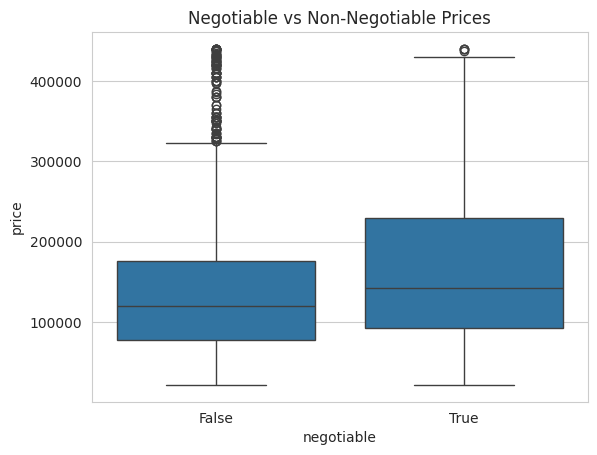

In [19]:
df["negotiable"] = df["description"].str.contains("Negotiable", case=False)

sns.boxplot(data=df, x="negotiable", y="price")
plt.title("Negotiable vs Non-Negotiable Prices")
plt.show()

##  Negotiable vs Non-Negotiable Prices

To understand pricing behavior, listings were divided into two categories based on whether the description contained the word **“Negotiable”**. The boxplot compares price distributions between negotiable and non-negotiable listings.

---

##  1. Non-Negotiable Listings (False)

- **Lower median price** (around ~110k).
- **Smaller overall price range**.
- A noticeable cluster of outliers appears near **300k–350k**, suggesting that even some higher-end sellers list fixed prices.
- In general, non-negotiable properties tend to fall within **more affordable or mid-range categories**.

### Interpretation  
Non-negotiable prices usually appear in:
- Standard apartments  
- Properties with fixed developer pricing  
- Listings where the seller expects a quick or direct sale  

---

##  2. Negotiable Listings (True)

- **Higher median price** (around ~140k–150k).
- **Much wider spread**, extending up to **450k+**.
- Contains significantly more high-value properties.
- The upper quartile is noticeably higher than in the non-negotiable group.

### Interpretation  
Negotiable prices often appear in:
- More expensive or luxury properties  
- Listings where the seller expects negotiation as part of the process  
- Properties with flexible pricing due to size, custom features, or location  

---

##  3. Key Insights

### **1. Negotiable listings tend to be more expensive**
The median price is clearly higher for negotiable properties, indicating that higher-priced properties are more likely to offer negotiation flexibility.

### **2. Price variability is greater when prices are negotiable**
The spread of negotiable prices is significantly wider, showing:
- Greater diversity in property types  
- Presence of both mid-range and high-end properties  
- More uncertainty or flexibility in market valuation  

### **3. Non-negotiable listings are more predictable**
They cluster tightly around lower-to-mid price levels, reinforcing the idea that these listings are more standardized (e.g., apartments, smaller homes).

---

##  Summary

- **Negotiable properties are typically higher priced**, with a median that is noticeably above that of non-negotiable listings.
- **Price variability is much larger** among negotiable listings, reflecting a mix of mid-range and high-end properties.
- **Non-negotiable listings** tend to fall within a more consistent and lower price range.
- This feature (“negotiable”) may serve as a helpful categorical variable in modeling, as it carries meaningful price-related information.

